In [1]:
import sys, os
from pathlib import Path
home_path = "/Users/nd21aad/Phd/Projects/enose-analysis-crick"  # Define project root directory
os.chdir(home_path)         # Change working directory to project root directory
sys.path.append(home_path)  # Add project root directory to python path
home_path = Path(home_path)

import pandas as pd
import matplotlib as mpl
new_rc_params = {"text.usetex": False, "svg.fonttype": "none"}
mpl.rcParams.update(new_rc_params)

import src.visualizations.setup as visualizations
# Defining directories
result_dir_parent = home_path.joinpath("results/newest/setup")
result_dir_parent.mkdir(exist_ok=True, parents=True)

parent_dir = Path('/Volumes/SSDExtreme/Work/Data/Crick')    # Change this to the directory where you store the data
data_dir_enose = parent_dir.joinpath('Dataset-FastMachineOlfaction/Enose')
data_dir_pid = parent_dir.joinpath("Dataset-FastMachineOlfaction/PID/Full")

In [2]:
# Load data index
index_file_enose = data_dir_enose.joinpath("index.csv")
index_df_enose_all = pd.read_csv(index_file_enose)
index_enose_pulses_all = index_df_enose_all.query(f"kind == 'pulse' & gas1 != 'b1' & gas1 != 'b2' & gas1 != 'blank'")#.iloc[0]
index_df_enose = index_df_enose_all[index_df_enose_all['condition']=='LconstRcycle25ms']    
index_file_pid = data_dir_pid.joinpath("index.csv")
index_df_pid = pd.read_csv(index_file_pid)

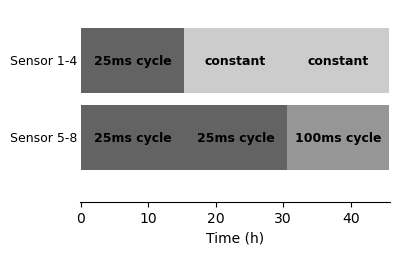

In [3]:
# Plot experimental protocol
visualizations.plot_protocol(index_df_enose_all, result_dir_parent)


Chi-squared statistic: 137.06528308611078 
 P-value: 0.363634040284097

Fail to reject the null hypothesis: Classes are distributed randomly over time.


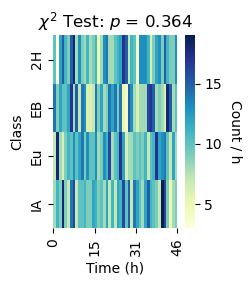

In [4]:
# Chi2-test and contigency table

# Determine the significance level (e.g., 0.05)
alpha = 0.05
# Calculate
contingency_table, chi2, p, num_bins = visualizations.check_chi2(index_enose_pulses_all)
# Output the results
print("\nChi-squared statistic:", chi2, "\n", "P-value:", p)
# Check the p-value against the significance level
if p < alpha:
    print("\nReject the null hypothesis: Classes are not distributed randomly over time.")
else:
    print("\nFail to reject the null hypothesis: Classes are distributed randomly over time.")
# Plot
visualizations.plot_contingencytable(index_enose_pulses_all, contingency_table, p, num_bins, result_dir_parent)

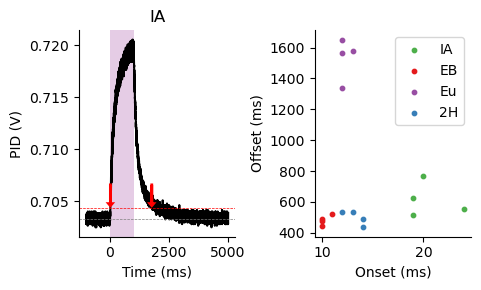

In [5]:
# Plot PID sample with onset & offset
visualizations.plot_pid_onoffset(index_df_pid, data_dir_pid, result_dir_parent)

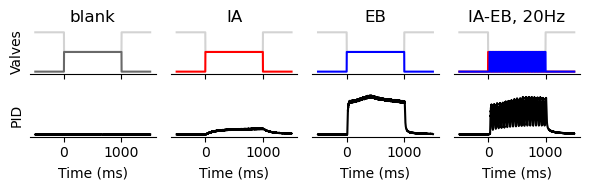

In [6]:
# Plot PID samples 
visualizations.plot_pid_samples(index_df_pid, data_dir_pid, result_dir_parent, t_min=-500, t_max=1500)

/Users/nd21aad/Phd/Projects/High-Speed-Odour-Sensing-Using-Miniaturised-Electronic-Nose/src/visualizations/setup.py:297: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


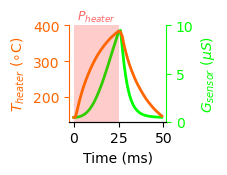

In [7]:
# Plot enose sample
visualizations.plot_enose_cycle(index_df_enose, data_dir_enose, result_dir_parent)

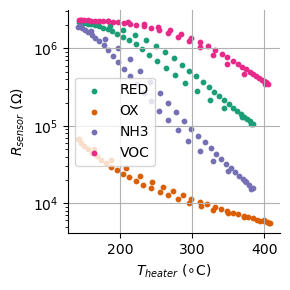

In [8]:
# Plot T/R for one cycle well after a stimulus
visualizations.plot_T_R(index_df_enose, data_dir_enose, result_dir_parent)